In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import NMF
kf = KFold(n_splits=5)

Original = [
    [1,1,0,1],
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,1],
    [1,0,1,0]
]
Original = np.array(Original)

print(kf.split(Original))

<generator object _BaseKFold.split at 0x000001FD6044F5E8>


In [2]:
fold_no = 1
#for train_index, test_index in skf.split(df, target):
for train_index, test_index in kf.split(Original):
    print(Original[train_index])
    print(Original[test_index])
    #train = df.loc[train_index,:]
    #test = df.loc[test_index,:]
    #print('Fold',str(fold_no),'Class Ratio:',sum(test['status'])/len(test['status']))
    fold_no += 1

[[0 0 1 1]
 [1 0 0 0]
 [0 1 0 1]
 [1 0 1 0]]
[[1 1 0 1]]
[[1 1 0 1]
 [1 0 0 0]
 [0 1 0 1]
 [1 0 1 0]]
[[0 0 1 1]]
[[1 1 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [1 0 1 0]]
[[1 0 0 0]]
[[1 1 0 1]
 [0 0 1 1]
 [1 0 0 0]
 [1 0 1 0]]
[[0 1 0 1]]
[[1 1 0 1]
 [0 0 1 1]
 [1 0 0 0]
 [0 1 0 1]]
[[1 0 1 0]]


In [3]:
K = 4
model = NMF(n_components=K) 



W = model.fit_transform(Original)
H = model.components_

print("W\n",np.round(W,2))
print("H\n",np.round(H,2))

W
 [[1.18 0.   0.   0.25]
 [0.   0.   1.24 0.3 ]
 [0.05 0.93 0.   0.  ]
 [0.   0.   0.   1.68]
 [0.   1.08 0.62 0.  ]]
H
 [[0.85 0.72 0.   0.71]
 [0.97 0.   0.24 0.  ]
 [0.   0.   0.88 0.53]
 [0.   0.57 0.   0.61]]


In [4]:
crossValue = np.dot(W,H)
print("crossValue \n",crossValue)
print("rounded Values\n",np.round(crossValue,2))
print("Original\n",Original)

crossValue 
 [[1.00216540e+00 9.98797179e-01 7.75293012e-04 9.98711748e-01]
 [0.00000000e+00 1.71924473e-01 1.09661361e+00 8.38239017e-01]
 [9.44045200e-01 3.30259321e-02 2.25202375e-01 3.26570091e-02]
 [1.50913517e-03 9.69658744e-01 0.00000000e+00 1.02891388e+00]
 [1.04831631e+00 0.00000000e+00 8.05484880e-01 3.25726756e-01]]
rounded Values
 [[1.   1.   0.   1.  ]
 [0.   0.17 1.1  0.84]
 [0.94 0.03 0.23 0.03]
 [0.   0.97 0.   1.03]
 [1.05 0.   0.81 0.33]]
Original
 [[1 1 0 1]
 [0 0 1 1]
 [1 0 0 0]
 [0 1 0 1]
 [1 0 1 0]]


In [12]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.17       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
#    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last],2), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Last Value')
    ax.set_title('Row Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0]), ('Original', 'Cross Value'))

    plt.show()

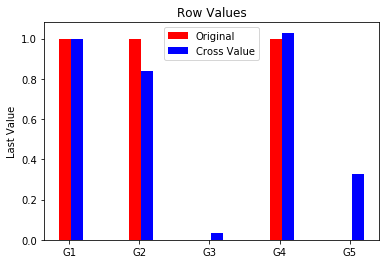

In [13]:
plotCompare(Original,crossValue)